# Lesson - Web Scraping

A lot of data aren't accessible through data sets or APIs. They may exist on the Internet as Web pages, though. One way to access the data without waiting for the provider to create an API is to use a technique called Web scraping.

Web scraping allows us to load a Web page into Python and extract the information we want. We can then work with the data using standard analysis tools like `pandas` and `numpy`.

Before we can do Web scraping, we need to understand the structure of the Web page we're working with, then find a way to extract parts of that structure in a sensible way.

We'll use the `requests` library heavily. This library enables us to download a Web page. We'll also use the `beautifulsoup` library to extract the relevant parts of the Web page.

### Web Page Structure

Web pages use **HyperText Markup Language** (HTML). HTML isn't a programming language like Python. It's a markup language with its own syntax and rules. When a Web browser like Chrome or Firefox downloads a Web page, it reads the HTML to determine how to render it and display it. 

Here's the HTML for a very simple Web page:


HTML consists of tags. We open a tag like this:

`<p>`

We close a tag like this:

`</p>`

Anything in between the opening and closing of a tag is the content of that tag. We can nest tags to create complex formatting rules. Here's an example:


The `b` tag bolds the content inside it, and the `p` tag creates a new paragraph. The HTML above will display as a bold paragraph because the `b` tag is inside the `p` tag. In other words, the `b` tag is nested within the `p` tag.

HTML documents contain a few major sections. The `head` section contains information that's useful to the Web browser that's rendering the page; the user doesn't see it. The `body` section contains the bulk of the content the user interacts with on the page.

Different tags have different purposes. For example, the `title` tag tells the Web browser what page title to display at the top of your tab. The `p` tag indicates that the content inside it is a single paragraph.

Please read the [Mozilla Developer Network's (MDN) article on HTML basics](https://developer.mozilla.org/en-US/docs/Learn/Getting_started_with_the_web/HTML_basics). For a more of a grounding on this topic. Check out [MDN's guide to the HTML element](https://developer.mozilla.org/en-US/docs/Web/HTML/Element) for a list of all possible HTML tags. In order to do Web scraping effectively, one needs a solid understanding of the various tags and how they work.

In the following exercise, we'll make a GET request to http://dataquestio.github.io/web-scraping-pages/simple.html

**Exercise**

- Make a `GET` request to `http://dataquestio.github.io/web-scraping-pages/simple.html`, and assign the result to the variable response.
- Use `response.content` to get the content of the response, and assign it to `content`.


In [5]:
import requests

response = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")

content = response.content

print(content)

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'


### Retrieving Elements from a Page

After downloading, we need to parse the page to extract information that we want. We'll use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) library to parse the Web page with Python. This library allows us to extract tags from an HTML document.

We can think of HTML documents as "trees," and the nested tags as "branches" (similar to a family tree). BeautifulSoup works the same way.

If we look at this page, for example, the root of the "tree" is the `html` tag:
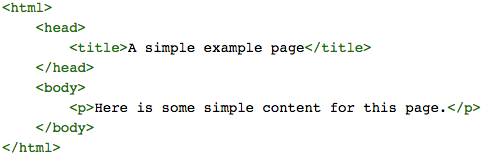

The `html` tag contains two "branches," `head` and `body`. `head` contains one "branch," `title`. `body` contains one branch, `p`. Drilling down through these multiple branches is one way to parse a Web page.

To extract the text inside the `p` tag, we would first need to get the `body` element, then the `p` element, and then finally the text inside the `p` element.

**Exercise**

- Get the text inside the `body` tag, and assign the result to `body_text
- Get the text inside the `title` tag, and assign the result to `title_text`


In [7]:
from bs4 import BeautifulSoup

# Initialize the parser, and pass in the content we grabbed earlier.

parser = BeautifulSoup(content, 'html.parser')

# Get the body tag from the document.
# Since we passed in the top level of the document to the parser, we need to pick a branch off of the root.
# With BeautifulSoup, we can access branches by using tag types as attributes.

body = parser.body

# Get the p tag from the body.
p = body.p
body_text = p.text

# Print the text inside the p tag.
# Text is a property that gets the inside text of a tag.
print(body_text)

# Get the head tag from the document.

head = parser.head

# Get the title tag from the head.

title = head.title
title_text = title.text

print(title_text)

Here is some simple content for this page.
A simple example page


### Using `find_all`

tag type as a property, is not always a very robust way to parse a document. It's usually better to be more explicit by using the `find_all` method. This method will find all occurrences of a tag in the current element, and return a **list**.

If we only want the first occurrence of an item, we'll need to index the list to get it. Aside from this difference, it behaves the same way as passing in the tag type as an attribute.

**Exercise**
- Apply the find_all method to get the text inside the `body` tag, and assign the result to `body_text
- Apply the find_all method to get the text inside the `title` tag, and assign the result to `title_text`.

In [8]:
from bs4 import BeautifulSoup

# Initialize the parser, and pass in the content we grabbed earlier.

parser = BeautifulSoup(content, 'html.parser')

# Get a list of all occurrences of the body tag in the element.
body = parser.find_all("body")

# Get the paragraph tag.
p = body[0].find_all("p")

body_text = p[0].text

# Get the text.
print(body_text)

# Get the head tag from the document.

head = parser.find_all("head")

# Get the title tag from the head.

title = head[0].find_all("title")
title_text = title[0].text

print(title_text)

Here is some simple content for this page.
A simple example page


### Element IDs

HTML allows elements to have IDs. Because they are unique, we can use an ID to refer to a specific element. Here's an example page:

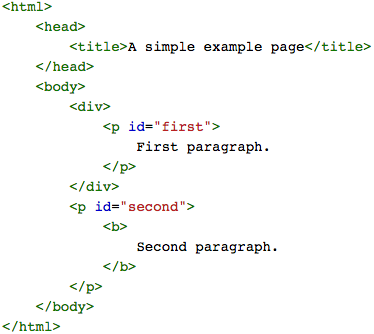

You can see the page [here](http://dataquestio.github.io/web-scraping-pages/simple_ids.html).

HTML uses the `div` tag to create a divider that splits the page into logical units. We can think of a divider as a "box" that contains content. For example, different dividers hold a Web page's footer, sidebar, and horizontal menu.

There are two paragraphs on the page; the first is nested inside a `div`. the paragraphs have IDs. This means we can access them easily, even though they're nested.

**Exercise**

Get the text of the first and second paragraph (what's inside the first and second `p` tag), and assign the results to `first_paragraph_text` and `second_paragraph_text`.

In [30]:
import requests

response = requests.get("http://dataquestio.github.io/web-scraping-pages/simple_ids.html")
content = response.content

from bs4 import BeautifulSoup

# Initialize the parser, and pass in the content we grabbed earlier.

parser = BeautifulSoup(content, 'html.parser')

# Get a list of all occurrences of the paragraph tag in the element with id="first".
first_paragraph = parser.find_all("p", id="first")

first_paragraph_text = first_paragraph[0].text
print(first_paragraph_text)

second_paragraph = parser.find_all("p", id="second")

second_paragraph_text = second_paragraph[0].text
print(second_paragraph_text)


                First paragraph.
            


                Second paragraph.
            



### Element Classes

In HTML, elements can also have classes. Classes aren't globally unique. In other words, many different elements belong to the same class, usually because they share a common purpose or characteristic.

For example, you may want to create three dividers to display three of your photographs. You can create a common look and feel for these dividers, such as a border and caption style.

This is where classes come into play. We could create a `class` called "gallery," define a style for it once using CSS , and then apply that `class` to all of the dividers we'll use to display photos. One element can even have multiple classes.

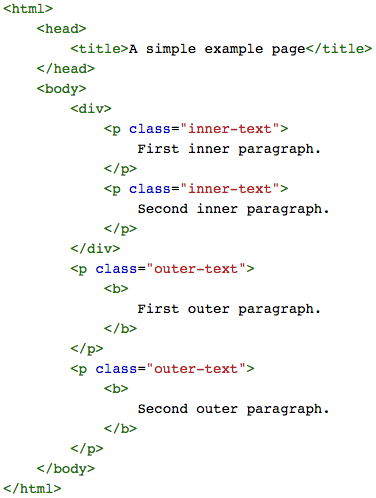

 This [page](http://dataquestio.github.io/web-scraping-pages/simple_classes.html) shows how classes have been used to style paragraphs.
 
 We can use `find_all` to select elements by class. We'll just need to pass in the `class_` parameter.
 
**Exercise**

- Get the text in the first and second inner paragraph, and assign the results to `first_inner_paragraph_text` and `second_inner_paragraph_text`.
- Get the text of the first outer paragraph, and assign the result to `first_outer_paragraph_text`.

In [33]:
# Get the website that contains classes.
response = requests.get("http://dataquestio.github.io/web-scraping-pages/simple_classes.html")
content = response.content
parser = BeautifulSoup(content, 'html.parser')

# Get the first inner paragraph.
# Find all the paragraph tags with the class inner-text.
# Then, take the first element in that list.
first_inner_paragraph = parser.find_all("p", class_="inner-text")[0]

first_inner_paragraph_text = first_inner_paragraph.text
print(first_inner_paragraph_text)

# second innner paragraph

second_inner_paragraph = parser.find_all("p", class_="inner-text")[1]
second_inner_paragraph_text = second_inner_paragraph.text
print(second_inner_paragraph_text)

# first outer paragraph

first_outer_paragraph = parser.find_all("p", class_="outer-text")[0]

first_outer_paragraph_text = first_outer_paragraph.text
print(first_outer_paragraph_text)



                First paragraph.
            

                Second paragraph.
            


                First outer paragraph.
            



### CSS Selector

**Cascading Style Sheets**, or **CSS**, is a language for adding styles to HTML pages. Most Web pages use CSS to display a lot more than basic black text.

CSS uses selectors to add styles to the elements and classes of elements we specify. We can use selectors to add background colors, text colors, borders, padding, and many other style choices to the elements on HTML pages. Details about CSS can be found at [MDN guide](https://developer.mozilla.org/en-US/docs/Learn/CSS/First_steps). 

This CSS will make all of the text inside all paragraphs red:
```
p{
    color: red
 }
 
```

This CSS will change the text color to red for any paragraphs that have the class inner-text. We select classes with the period or dot symbol (.):
```
p.inner-text{
    color: red
 }
 ```
 This CSS will change the text color to red for any paragraphs that have the ID first. We select IDs with the pound or hash symbol (#):
 ```
 p#first{
    color: red
 }
 ```
We can also style IDs and classes without using any specific tags. For example, this CSS will make the element with the ID first red (not just paragraphs):
```
#first{
    color: red
 }
 ```
 This CSS will make any element with the class inner-text red:
 ```
 .inner-text{
    color: red
 }
 ```
 

### Using CSS Selectors

We can use BeautifulSoup's `.select` method to work with CSS selectors. Here's the HTML we'll be working with:
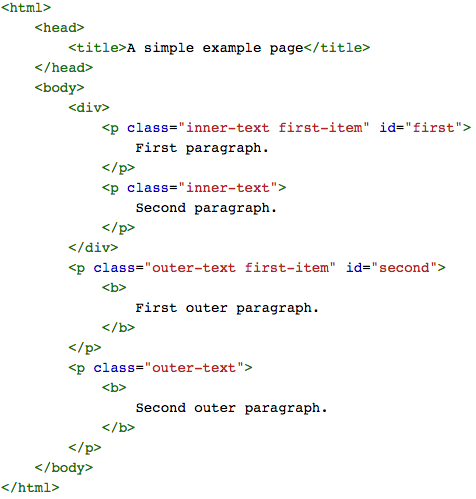

It can be noticed that the same element can have both an `ID` and a `class`. We can also assign multiple classes to a single element; we just separate the classes with a space.

Here is the [Web page](http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html) that corresponds to the HTML above.

**Example**

- Select all of the elements that have the class `first-item`
- Select all of the elements that have the class `outer-text`.
- Assign the text of the first paragraph that has the class `first-item` to `first-item_text`.
- Assign the text of the first paragraph that has the class `outer-text` to `first_outer_text`.
- Select all of the elements that have the ID `second`.

- Assign the text of the first paragraph that has the ID `second` to the variable `second_text`.



In [3]:
 # Get the website that contains classes and IDs.

import requests    

response = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
content = response.content

from bs4 import BeautifulSoup
parser = BeautifulSoup(content, 'html.parser')

# Select all of the elements that have the first-item class.
first_items = parser.select(".first-item")

first_items_text = first_items[0].text

# Print the text of the first paragraph (the first element with the first-item class).
print(first_items_text)

# Select all of the elements that have the outer-text class.
first_outer = parser.select(".outer-text")
first_outer_text = first_outer[0].text

print(first_outer_text)

# Select all of the elements that have the the ID `second`.
second = parser.select("#second")
second_text = second[0].text

print(second_text)


                First paragraph.
            


                First outer paragraph.
            



                First outer paragraph.
            



### Nesting CSS Selectors

We can nest CSS selectors similar to the way HTML nests tags. For example, we could use selectors to find all of the paragraphs inside the `body` tag. Nesting is a very powerful technique that enables us to use CSS to do complex Web scraping tasks.

This selector will target any paragraph inside a div tag:
`div p`

This selector will target any item inside a `div` tag that has the class `first-item`:

`div .first-item`

This one is even more specific. It selects any item that's inside a `div` tag inside a `body` tag, but only if it also has the `ID` first:

`body div #first`

This selector zeroes in on any items with the ID first that are inside any items with the class first-item:

`.first-item #first`



### Using Nested CSS Selectors

We can use nested CSS selectors with the same `.select` method we used for our CSS selectors.
We'll be practicing on this HTML:
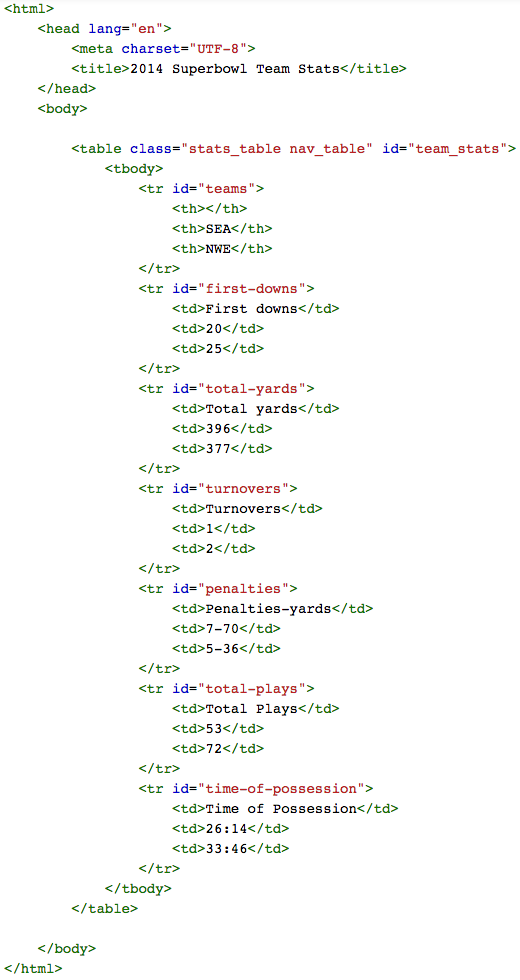

It's an excerpt from a box score of the 2014 Super Bowl, a National Football League (NFL) game in which the New England Patriots played the Seattle Seahawks. The box score contains information on how many yards each team gained, how many turnovers each team had, and so on. Check out the [Web page](http://dataquestio.github.io/web-scraping-pages/2014_super_bowl.html) this HTML renders.

The page renders as a table with column and row names. The first column is for the Seattle Seahawks, and the second column is for the New England Patriots. Each row represents a different statistic.

**Exercise**

- Find the Total Seahawk turnovers, and assign the result to `seahawks_turnovers_count`
- Find the Total Plays for the New England Patriots, and assign the result to `patriots_total_plays_count`.

- Find the Total Yards for the Seahawks, and assign the result to `seahawks_total_yards_count`.

In [5]:
# Get the Superbowl box score data.
response = requests.get("http://dataquestio.github.io/web-scraping-pages/2014_super_bowl.html")
content = response.content
parser = BeautifulSoup(content, 'html.parser')

# Find the number of turnovers the Seahawks committed.
turnovers = parser.select("#turnovers")[0]
seahawks_turnovers = turnovers.select("td")[1]
seahawks_turnovers_count = seahawks_turnovers.text
print(seahawks_turnovers_count)

# Find the Total Plays for the New England Patriots.

patriots_total_plays_count = parser.select("#total-plays")[0].select("td")[2].text
print(patriots_total_plays_count)


# Find the Total Yards for the Seahawks.
seahawks_total_yards_count = parser.select("#total-yards")[0].select("td")[1].text
print(seahawks_total_yards_count)

1
72
396
